**Tarea 2: Redes Convolucionales y Recurrentes**

# Ejercicio 1: Operación de convolución

Se toma como base el código del [notebook referenciado en la tarea](https://github.com/gibranfp/CursoAprendizajeProfundo/blob/2026-1/notebooks/2a_convolucion.ipynb), no obstante solo se mantiene lo relevante para la primera pregunta.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

**Importamos y normalizamos datos**

In [2]:
digits = load_digits()
data = digits.images
labels = digits.target
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
data = data / data.max()
data[0]

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

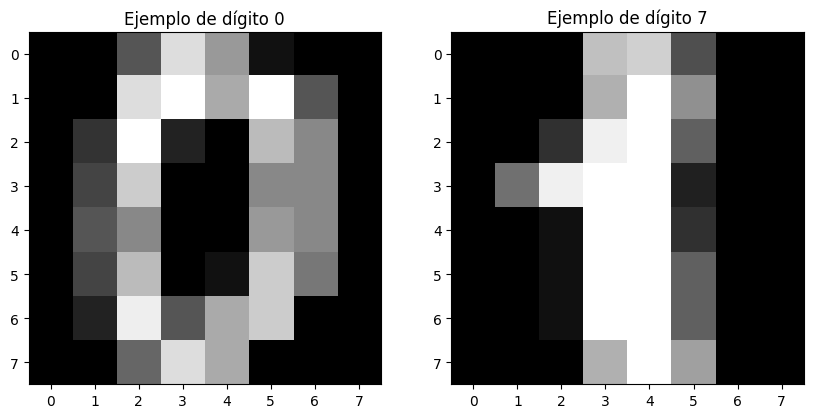

In [4]:
imagen0 = data[labels == 0][0]
imagen1 = data[labels == 1][0]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(imagen0, cmap = 'gray')
axs[0].set_title('Ejemplo de dígito 0')
axs[1].imshow(imagen1, cmap = 'gray')
axs[1].set_title('Ejemplo de dígito 7')
plt.show()

In [18]:
"""
FUNCIÓN ORIGINAL
"""
def conv2d(I, W, b, stride = 1):
  h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
  w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
  a = np.zeros((h_s, w_s))
  for i in range(h_s):
    for j in range(w_s):
      I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1]]
      a[i, j] = (I_m * W).sum() + b

  return a

## Filtro

Definamos un filtro de $3 \times 3$ que detecte bordes en cierta orientación:

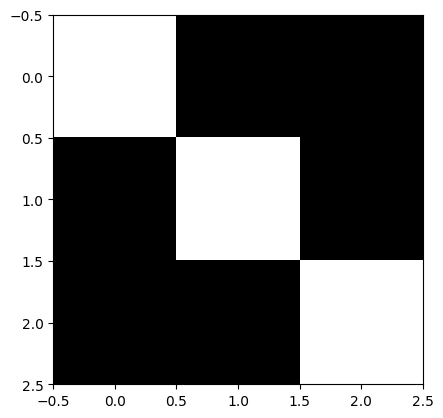

In [19]:
# No se modifica el filtro, pero como bien se describe en el notebook, se pueden tener distintos filtros.
filter1 = np.zeros((3,3))
np.fill_diagonal(filter1, np.array([1, 1, 1]))
plt.imshow(filter1 * 0.5 + 0.5, cmap = 'gray')
plt.show()

<span style="color:RED">----------------------SOLUCIÓN DE TAREA----------------------</span>

**Ejercicio 1: Operación de convolución**

Para modificar esta función y obtener una convolución que funcione sobre varios canales y que permita trabajar con imágenes a color en realidad se tienen que hacer pocos cambios a la función previamente definida. La convolución será igual para cualquier canal, lo único necesario es agregar este canal al procesamiento de la función. 

1. Primero definimos la función turn_2d3d( ) que extendiende una imagen de nuestro dataset para tener 3 canales. Como podemos ver es cuestión de agregar la dimensión de los canales y rellenarlos manualmente.
2. Siguiente es la función conv3d( ) que es básciamente igual a conv2d( ) solo que en el bucle del doble for, la variable I_m recorre las dimensiones base de la imagen al igual que la última dimensión de coloración. Esto se hace gracias a que agregamos un ":" al final de la lista.

In [7]:
def turn_2d3d(imagen_base):
    """
    Extiende una imagen del conjunto de datos previo para tener 3 canales.
    """
    imagen_3d = np.zeros((8,8,3))

    # Estos valores en realidad no cambian nada de la imagen original
    # Solo modifican la intensidad para que al menos algo cambie.
    imagen_3d[:, :, 0] = imagen_base
    imagen_3d[:, :, 1] = imagen_base * 0.2
    imagen_3d[:, :, 2] = imagen_base * 0.5
    return imagen_3d

# Imprimimos la forma del arreglo para ver los cambios
imagen0_3d = turn_2d3d(imagen0)
print(imagen0.shape, imagen0_3d.shape)

(8, 8) (8, 8, 3)


In [8]:
def conv_rgb(I, W, b, stride = 1):
    """
    Convolución para imágenes a color. Usa los mismos parámetros que la convolución 2d. 
    """
    h_s = int(np.floor((I.shape[0] - W.shape[0]) / stride)) + 1
    w_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
    a = np.zeros((h_s, w_s))
    for i in range(h_s):
        for j in range(w_s):
            I_m = I[i * stride:i * stride + W.shape[0], j * stride:j * stride + W.shape[1], :] # ¡Aquí está el cambio!
            a[i, j] = (I_m * W).sum() + b

    return a

# Notamos que sigue funcionando sin importar el cambio que le acabamos de hacer.
conv_rgb(imagen0_3d, filter1, 0)

array([[1.06875, 1.5375 , 3.03125, 2.95625, 1.93125, 1.85   ],
       [1.3375 , 1.46875, 3.025  , 2.25   , 1.70625, 2.3875 ],
       [1.24375, 1.25   , 2.2125 , 1.     , 1.1    , 2.05   ],
       [1.13125, 1.2    , 1.96875, 0.91875, 1.14375, 2.1    ],
       [1.16875, 1.25625, 2.46875, 1.48125, 1.56875, 2.25   ],
       [1.04375, 1.325  , 2.81875, 2.1375 , 1.83125, 1.5875 ]])

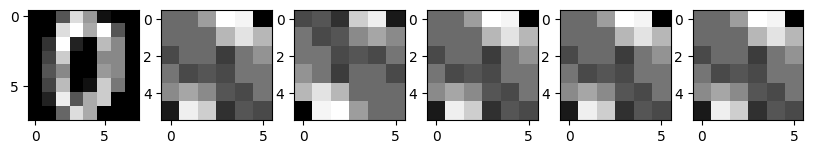

In [10]:
from scipy.signal import correlate2d, convolve2d

sigmoid = lambda z: 1. / (1. + np.exp(-z))

ccorr = sigmoid(correlate2d(imagen0, filter1, mode = 'valid'))
ccorr2 = sigmoid(correlate2d(filter1, imagen0, mode = 'valid'))

conv = sigmoid(convolve2d(imagen0, filter1, mode = 'valid'))
conv2 = sigmoid(convolve2d(filter1, imagen0, mode = 'valid'))

a = sigmoid(conv2d(imagen0, filter1, 0))

fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(imagen0, cmap = 'gray')
axs[1].imshow(ccorr, cmap = 'gray')
axs[2].imshow(ccorr2, cmap = 'gray')
axs[3].imshow(conv, cmap = 'gray')
axs[4].imshow(conv2, cmap = 'gray')
axs[5].imshow(a, cmap = 'gray')
plt.show()

**Hacemos las mismas gráficas que en la celda previa pero con la convolución RGB**

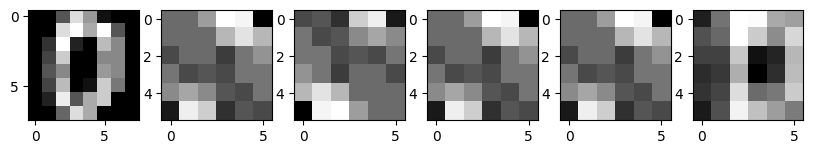

In [11]:
from scipy.signal import correlate2d, convolve2d

ccorr = sigmoid(correlate2d(imagen0, filter1, mode = 'valid'))
ccorr2 = sigmoid(correlate2d(filter1, imagen0, mode = 'valid'))

conv = sigmoid(convolve2d(imagen0, filter1, mode = 'valid'))
conv2 = sigmoid(convolve2d(filter1, imagen0, mode = 'valid'))

a = sigmoid(conv_rgb(turn_2d3d(imagen0), filter1, 0)) #Aquí está el pequeño cambio

fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(imagen0, cmap = 'gray')
axs[1].imshow(ccorr, cmap = 'gray')
axs[2].imshow(ccorr2, cmap = 'gray')
axs[3].imshow(conv, cmap = 'gray')
axs[4].imshow(conv2, cmap = 'gray')
axs[5].imshow(a, cmap = 'gray')
plt.show()

<span style="color:RED">----------------------FIN DEL EJERCICIO 1----------------------</span>

# Ejercico 3: Clasificación de rostros

Los datos de FairFace están disponibles desde HuggingFace, por lo que la importación se hace desde ahí. El código de la red neuronal se hace usando PyTroch. La evaluación de clasificación se hace con Sklearn.

In [20]:
from datasets import load_dataset

ff_ds = load_dataset("HuggingFaceM4/FairFace", "0.25")
ff_ds

README.md: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


(…)-00000-of-00002-d405faba4f4b9b85.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


(…)-00001-of-00002-dd3cb68164727418.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


(…)-00000-of-00001-951dbd63c8724ee1.parquet:   0%|          | 0.00/63.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/86744 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10954 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test'],
        num_rows: 86744
    })
    validation: Dataset({
        features: ['image', 'age', 'gender', 'race', 'service_test'],
        num_rows: 10954
    })
})